In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         501 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288860,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704507,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
from sklearn.model_selection import train_test_split
train_set, test_size = train_test_split(df, test_size = 0.2, random_state = 42)
print(f'Rows In train set:{len(train_set)} \nRows in Test set:{len(test_size)}\n')

Rows In train set:404 
Rows in Test set:102



 df[chas] is very imp feature in this problem so we split the values of chas in equal quantity for training and
testing purpose

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['chas']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [9]:
strat_train_set['chas'].value_counts()

0    376
1     28
Name: chas, dtype: int64

In [10]:
strat_test_set['chas'].value_counts()

0    95
1     7
Name: chas, dtype: int64

In [11]:
print(95/7)
print(376/28)

13.571428571428571
13.428571428571429


In [12]:
df = strat_train_set.copy()

In [13]:
df.shape

(404, 14)

In [14]:
corr_matrix = df.corr()
corr_matrix['medv'].sort_values(ascending = False)

medv       1.000000
rm         0.680148
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

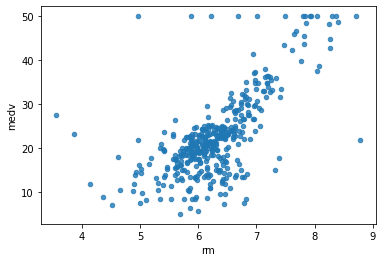

In [15]:
df.plot(kind = 'scatter', x = 'rm', y = 'medv', alpha = 0.8)
plt.show()

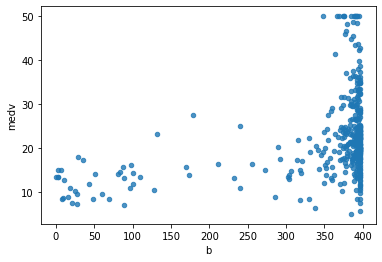

In [16]:
df.plot(kind = 'scatter', x = 'b', y = 'medv', alpha = 0.8)
plt.show()

In [17]:
df = strat_train_set.drop('medv', axis = 1)
df_labels = strat_train_set['medv'].copy()

## Imputer (for filling the missing values)

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [20]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [21]:
x = imputer.transform(df)

In [23]:
df_tr = pd.DataFrame(x, columns = df.columns)

In [25]:
df_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284337,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711068,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a pipeline

In [26]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [27]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

In [28]:
df_num_tr = my_pipeline.fit_transform(df)

In [29]:
df_num_tr.shape

(404, 13)

## Selecting The Desired Model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
model = LinearRegression()
model1 = DecisionTreeRegressor()
model2 = RandomForestRegressor()

In [33]:
model.fit(df_num_tr, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
some_data = df.iloc[:5]

In [35]:
some_labels = df_labels.iloc[:5]

In [36]:
prepared_data = my_pipeline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([23.95723298, 27.21131811, 20.61024705, 24.98744881, 23.6970819 ])

In [38]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(df_num_tr)
mse = mean_squared_error(df_labels, housing_predictions)
rmse = np.sqrt(mse)

In [40]:
rmse

4.828675274998192

In [43]:
model1.fit(df_num_tr, df_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [44]:
model1.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [45]:
housing_predictions = model1.predict(df_num_tr)
mse = mean_squared_error(df_labels, housing_predictions)
rmse = np.sqrt(mse)

In [46]:
rmse

0.0

In [47]:
model2.fit(df_num_tr, df_labels)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
model2.predict(prepared_data)

array([22.43, 27.12, 16.72, 23.27, 23.34])

In [49]:
housing_predictions = model2.predict(df_num_tr)
mse = mean_squared_error(df_labels, housing_predictions)
rmse = np.sqrt(mse)

In [50]:
rmse

1.5254383398593572

## Using better evaluation technique - Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, df_num_tr, df_labels, scoring= 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([2.81702013, 3.01895152, 4.43233325, 2.75608418, 3.91616426,
       3.59696574, 5.61539625, 3.49395871, 2.60182484, 3.53816937])

In [53]:
def print_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [54]:
print_scores(rmse_scores)

Scores: [2.81702013 3.01895152 4.43233325 2.75608418 3.91616426 3.59696574
 5.61539625 3.49395871 2.60182484 3.53816937]
Mean: 3.578686825265188
Standard Deviation: 0.8674282303004389


## Saving The Model

In [55]:
from joblib import dump, load
dump(model2, 'Dragon.joblib')

['Dragon.joblib']

In [56]:
x_test = strat_train_set.drop('medv', axis = 1)
y_test = strat_train_set['medv']
x_test_prepared = my_pipeline.transform(x_test)
final_prediction = model2.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [57]:
final_rmse

1.5254383398593572

In [58]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24829586, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [64]:
## Using the Model
model = load('Dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -5.24829586, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  5.41164221, -0.86091034]])
model.predict(features)

array([21.45])